In [1]:
import pandas as pd
# !pip install pyarrow
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5, palette='tab20') 

In [2]:
data = pd.read_parquet("../results/grid_search/45/ts_model-state.parquet")

In [3]:
data['max_interest'] = data['interest'].apply(max)

In [4]:
import numpy as np
from scipy import interpolate

Text(0.5, 0, 'max interest')

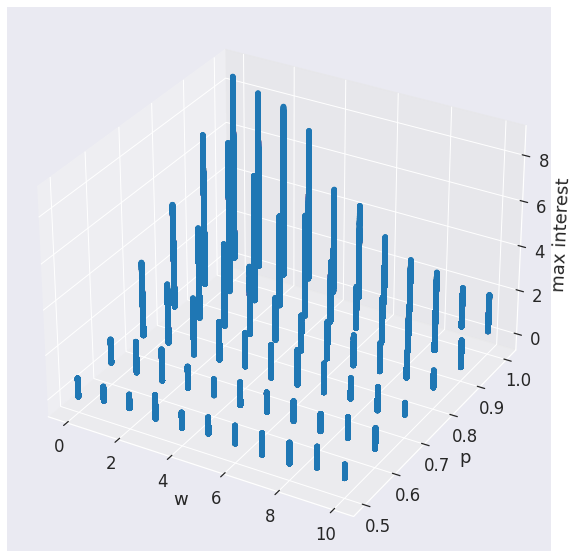

In [5]:

X = data['p']
Y = data['w']
Z = data['max_interest']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(Y, X, Z)
ax.set_xlabel("w")
ax.set_ylabel("p")
ax.set_zlabel("max interest")

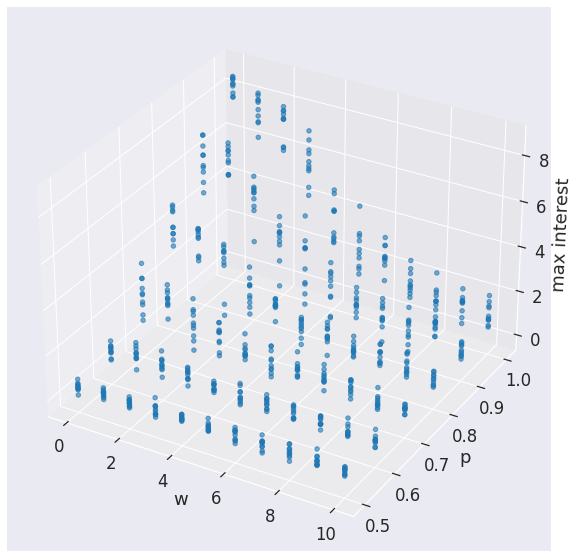

In [12]:
data_1999 = data.where(data['round'] == 1999)

X = data_1999['p']
Y = data_1999['w']
Z = data_1999['max_interest']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
plt.xlabel('w')
plt.ylabel('p')
ax.scatter(Y, X, Z, alpha=0.6)
ax.set_xlabel("w")
ax.set_ylabel("p")
ax.set_zlabel("max interest")
plt.savefig('3d_var_wp_max_interest.pdf');

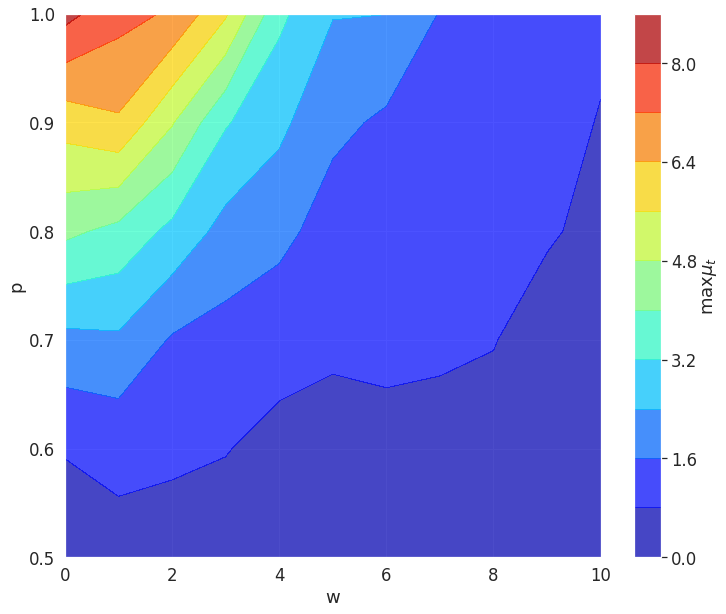

In [10]:
fig = plt.figure(figsize=(12,10))


data_1999 = data.where(data['round'] == 1999)

cols = ['p', 'w', 'max_interest']
xyz = data_1999[cols].groupby(['p','w']).mean(['max_interest'])
xyz = xyz.reset_index()
xyz.columns =  ['p', 'w', 'max_interest']
xyz = xyz.pivot('p', 'w')

X=xyz.columns.levels[1].values
Y=xyz.index.values
Z=xyz.values
Xi,Yi = np.meshgrid(X, Y)
plt.xlabel('w')
plt.ylabel('p')
ax = plt.contourf(Xi, Yi, Z, 10, alpha=0.7, cmap=plt.cm.jet)

cbar = fig.colorbar(ax)
cbar.set_label(r'$\max \mu_t$')

plt.savefig('countour_wp.pdf');